In [3]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
import numpy as np
import networkx as nx

In [4]:
def map_coloring(graph, colors):
    valid_colorings = []
    for coloring in np.ndindex(*([colors] * len(graph))):
        valid = True
        for edge in graph.edges():
            if coloring[edge[0]] == coloring[edge[1]]:
                valid = False
                break
        if valid:
            valid_colorings.append(coloring)
    return valid_colorings

In [5]:
# Create sample graph
G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (2, 0)])

# Calculate valid 3-colorings
valid_colorings = map_coloring(G, 3)
print(valid_colorings)

[(0, 1, 2), (0, 2, 1), (1, 0, 2), (1, 2, 0), (2, 0, 1), (2, 1, 0)]


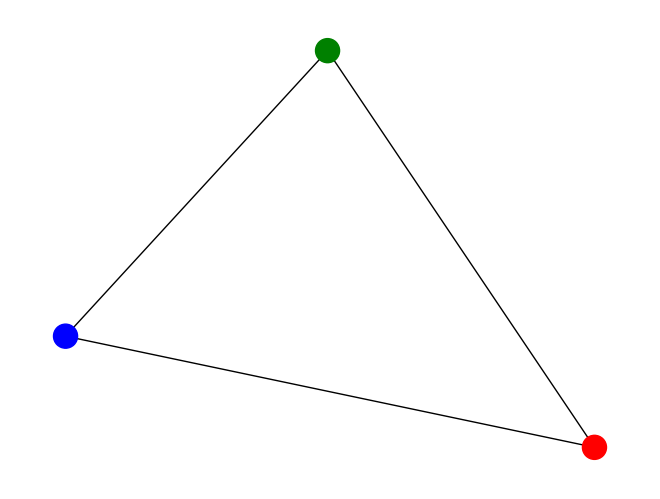

In [8]:
layout = nx.random_layout(G, seed=10)
colors = ["r", "g", "b"]
nx.draw(G, layout, node_color=colors)
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels);

In [15]:
G_australia = nx.Graph()
G_australia.add_edges_from([
    (0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (2, 3),
    (2, 5), (3, 5), (3, 6), (4, 6), (5, 7), (6, 7)
])
# Calculate valid 3-colorings
valid_colorings = map_coloring(G_australia, 3)
print(valid_colorings)

[(0, 1, 1, 2, 0, 0, 1, 2), (0, 1, 1, 2, 2, 0, 0, 1), (0, 1, 1, 2, 2, 0, 0, 2), (0, 1, 1, 2, 2, 0, 1, 2), (0, 2, 2, 1, 0, 0, 2, 1), (0, 2, 2, 1, 1, 0, 0, 1), (0, 2, 2, 1, 1, 0, 0, 2), (0, 2, 2, 1, 1, 0, 2, 1), (1, 0, 0, 2, 1, 1, 0, 2), (1, 0, 0, 2, 2, 1, 0, 2), (1, 0, 0, 2, 2, 1, 1, 0), (1, 0, 0, 2, 2, 1, 1, 2), (1, 2, 2, 0, 0, 1, 1, 0), (1, 2, 2, 0, 0, 1, 1, 2), (1, 2, 2, 0, 0, 1, 2, 0), (1, 2, 2, 0, 1, 1, 2, 0), (2, 0, 0, 1, 1, 2, 0, 1), (2, 0, 0, 1, 1, 2, 2, 0), (2, 0, 0, 1, 1, 2, 2, 1), (2, 0, 0, 1, 2, 2, 0, 1), (2, 1, 1, 0, 0, 2, 1, 0), (2, 1, 1, 0, 0, 2, 2, 0), (2, 1, 1, 0, 0, 2, 2, 1), (2, 1, 1, 0, 2, 2, 1, 0)]


In [16]:
G_australia = nx.Graph()
G_australia.add_edges_from([
    (0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (2, 3),
    (2, 5), (3, 5), (3, 6), (4, 6), (5, 7), (6, 7)
])
# Calculate valid 3-colorings
valid_colorings = map_coloring(G_australia, 3)
print(valid_colorings)

[(0, 1, 1, 2, 0, 0, 1, 2), (0, 1, 1, 2, 2, 0, 0, 1), (0, 1, 1, 2, 2, 0, 0, 2), (0, 1, 1, 2, 2, 0, 1, 2), (0, 2, 2, 1, 0, 0, 2, 1), (0, 2, 2, 1, 1, 0, 0, 1), (0, 2, 2, 1, 1, 0, 0, 2), (0, 2, 2, 1, 1, 0, 2, 1), (1, 0, 0, 2, 1, 1, 0, 2), (1, 0, 0, 2, 2, 1, 0, 2), (1, 0, 0, 2, 2, 1, 1, 0), (1, 0, 0, 2, 2, 1, 1, 2), (1, 2, 2, 0, 0, 1, 1, 0), (1, 2, 2, 0, 0, 1, 1, 2), (1, 2, 2, 0, 0, 1, 2, 0), (1, 2, 2, 0, 1, 1, 2, 0), (2, 0, 0, 1, 1, 2, 0, 1), (2, 0, 0, 1, 1, 2, 2, 0), (2, 0, 0, 1, 1, 2, 2, 1), (2, 0, 0, 1, 2, 2, 0, 1), (2, 1, 1, 0, 0, 2, 1, 0), (2, 1, 1, 0, 0, 2, 2, 0), (2, 1, 1, 0, 0, 2, 2, 1), (2, 1, 1, 0, 2, 2, 1, 0)]


In [7]:
def grover_search_oracle(graph, colors):
    num_qubits = len(graph) * 2  # 2 qubits per vertex
    qc = QuantumCircuit(num_qubits)

    # State preparation
    qc.h(range(num_qubits))

    # Oracle
    for edge in graph.edges():
        qc.ccx(2 * edge[0], 2 * edge[1], num_qubits)
        qc.x(num_qubits)
        qc.ccx(2 * edge[0], 2 * edge[1], num_qubits)
        qc.x(num_qubits)

    # Diffusion operator
    qc.h(range(num_qubits))
    qc.x(range(num_qubits))
    qc.h(range(num_qubits))
    qc.barrier()

    # Measurement
    qc.measure(range(num_qubits), range(num_qubits))

    # Simulation
    backend=AerSimulator()
    job=backend.run(qc) # Add this line to run the circuit
    result=job.result()
    counts = result.get_counts()

    return counts



In [8]:
### Approach 2: Modified Search Space

def grover_search_modified(graph, colors):
    num_qubits = len(graph)  # 1 qubit per vertex (3 colors)
    qc = QuantumCircuit(num_qubits)

    # State preparation
    qc.ry(np.pi/3, range(num_qubits))  # Prepare 3-color state

    # Oracle (unchanged)
    for edge in graph.edges():
        qc.cphase(np.pi, edge[0], edge[1])

    # Diffusion operator
    qc.ry(np.pi/3, range(num_qubits))
    qc.x(range(num_qubits))
    qc.ry(np.pi/3, range(num_qubits))
    qc.barrier()

    # Measurement
    qc.measure(range(num_qubits), range(num_qubits))

    # Simulation
    backend=AerSimulator()
    job=backend.run(qc) # Add this line to run the circuit
    result=job.result()
    counts = result.get_counts()

    return counts

In [13]:
# Create graph
G_australia = nx.Graph()
G_australia.add_edges_from([
    (0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (2, 3),
    (2, 5), (3, 5), (3, 6), (4, 6), (5, 7), (6, 7)
])

G_spain = nx.Graph()
# Add edges for Spain's 17 autonomous communities
G_spain.add_edges_from([
    (0, 8), (0, 9), (0, 10), (0, 14),  # Andalusia
    (1, 8), (1, 9), (1, 15),  # Aragon
    (2, 6), (2, 8), (2, 11),  # Asturias
    (4, 6), (4, 15),  # Basque Country
    (7, 8),  # Cantabria
    (9, 12),  # Castile-La Mancha
    (8, 11), (8, 13), (8, 9),  # Castile and León
    (10, 16),  # Extremadura
    (11, 13),  # Galicia
    (12, 15), (12, 16),  # La Rioja
    (9, 14), (10, 14),  # Madrid
    (0, 14), (14, 16),  # Murcia
    (1, 12), (1, 15), (3, 15),  # Navarre
    (9, 16), (14, 16)  # Valencia
])
# Calculate valid 3-colorings
valid_colorings_australia = map_coloring(G_australia, 3)
valid_colorings_spain = map_coloring(G_spain, 3)

# Run Grover's search
counts_australia_oracle = grover_search_oracle(G_australia, 3)
counts_spain_oracle = grover_search_oracle(G_spain, 3)

counts_australia_modified = grover_search_modified(G_australia, 3)
counts_spain_modified = grover_search_modified(G_spain, 3)

print("Valid 3-colorings Australia:", len(valid_colorings_australia))
print("Valid 3-colorings Spain:", len(valid_colorings_spain))

print("Grover Search Counts (Oracle) Australia:", counts_australia_oracle)
print("Grover Search Counts (Modified) Australia:", counts_australia_modified)

print("Grover Search Counts (Oracle) Spain:", counts_spain_oracle)
print("Grover Search Counts (Modified) Spain:", counts_spain_modified)

IndexError: tuple index out of range